5.1  Register for a stream of Twitter data

5.2  Create a bloom filter classifying two days worth of twitters  ( after removing stop words and urls )

5.3  For another days worth of twitter data find the previous twitters that match in the bloom filter
(This means get two days of data in one file or directory , use that data for training the bloom filter, capture a different days data in a different file ( or do it in real time)and capture the match output then running the new twitter data through the filter.

5.4 Plot a historgram of matches for each twitter in 5.3

For the 4-5 grade.- Submit in a separate notebook - YourNAME-Homework5-Supplement

1. Use a different machine learning training algorithm
2. Make a continous feed where you take two days of data and match the incoming stream ( do this for 5 days windowing the filter data)
3. Find new trends in the twitter feed (daily or hourly)
4. Or some other streaming exploration of your choosing

In [1]:
%%writefile code/twitter_streaming_DV.py
# %load code/twitter_streaming_DV.py


#Import the necessary methods from tweepy library
from tweepy.streaming import StreamListener
import tweepy
from tweepy import OAuthHandler
from tweepy import Stream

#Variables that contains the user credentials to access Twitter API
access_token = "131711504-uteEX6y8zoi0v4miLzEjZefg22ZZ8TgukyU9bHYW"
access_token_secret = "UH3dk5s00euTgzJ92xveSSi7b84Aw2rrrtFeHelV5rmIv"
consumer_key = "7lKe94q4mhbeINgp1hFWmpdGj"
consumer_secret = "T46JL4SAhMK3EmiXpCFzSVwQ6ipvQ0xfqHBGbAUbPBVjtbDDp1"


#This is a basic listener that just prints received tweets to stdout.
class StdOutListener(StreamListener):        
    def on_data(self, data):
        print(data)
        return True

    def on_error(self, status):
        print(status)


if __name__ == '__main__':

    #This handles Twitter authetification and the connection to Twitter Streaming API
    l = StdOutListener()
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    stream = Stream(auth, l)

    #This line filter Twitter Streams to capture data by the keywords: 'theano', 'tensorflow', 'keras'
    stream.filter(track=['theano', 'tensorflow', 'keras'])

Overwriting code/twitter_streaming_DV.py


In [ ]:
%%sh  
python code/Twitter_streaming_DV.py > tweepy_twits2.txt

In [1]:
import json
import pandas as pd
#tweets_data_path = 'data/tweepy_sports.txt'
tweets_data_path = 'tweepy_twits2.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
print(len(tweets_data))

tweets = pd.DataFrame()
tweets['text'] = list(map(lambda tweet: tweet['text'], tweets_data))
tweets['lang'] = list(map(lambda tweet: tweet['lang'], tweets_data))
tweets['time_zone'] = list(map(lambda tweet: tweet['user']['time_zone'], tweets_data))
tweets_by_lang = tweets['lang'].value_counts()
tweets.head()

3711


,text,lang,time_zone
0,RT @gitaputrid: Siram air keras ke Novel berbu...,in,Jakarta
1,RT @fchollet: TensorFlow 1.4 is now officially...,en,Central Time (US & Canada)
2,RT @fchollet: TensorFlow 1.4 is now officially...,en,Tokyo
3,Machine Learning with TensorFlow\n\n☞ https://...,en,Pacific Time (US & Canada)
4,"RT @rasbt: TensorFlow 1.4.0 was just released,...",en,Eastern Time (US & Canada)


#### The language 'in' encompasses both Malay and Indonesian languages, which seem to be the two major languages spoken in Indonesia. The reason I got the most tweets in this language is because of the word 'keras', which means hard in Indonesian language. I wanted to see the popularity of Deep Learning frameworks on twitter, but it seems we have a different meaning of 'keras' in Indonesian language, which is more common.

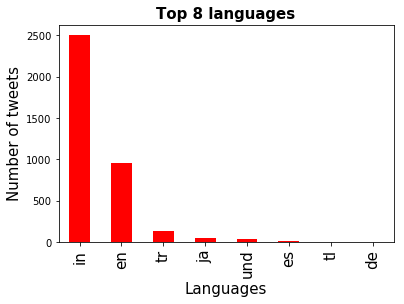

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 8 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:8].plot(ax=ax, kind='bar', color='red')

#### As we can see here, we got most tweets from Jakarta and Kuala Lumpur, which reiterates the above said reason.

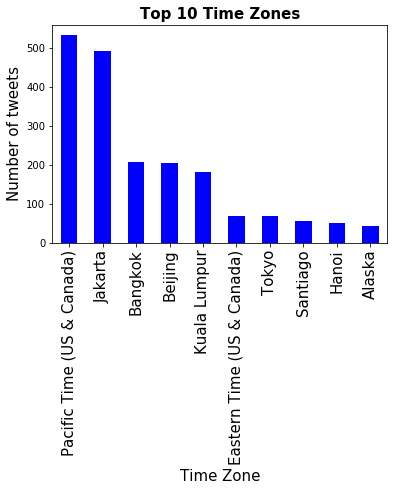

In [3]:
tweets_by_country = tweets['time_zone'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Time Zone', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 10 Time Zones', fontsize=15, fontweight='bold')
tweets_by_country[:10].plot(ax=ax, kind='bar', color='blue')

In [4]:
import re
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

tweets['theano'] = tweets['text'].apply(lambda tweet: word_in_text('theano', tweet))
tweets['tensorflow'] = tweets['text'].apply(lambda tweet: word_in_text('tensorflow', tweet))
tweets['keras'] = tweets['text'].apply(lambda tweet: word_in_text('keras', tweet))
print(tweets['theano'].value_counts()[True])
print(tweets['tensorflow'].value_counts()[True])
print(tweets['keras'].value_counts()[True])

5
760
2768


#### We can see that 'tensorflow' is popular on twitter than 'theano' but we really cannot conclude about 'keras' because of the reason stated above.

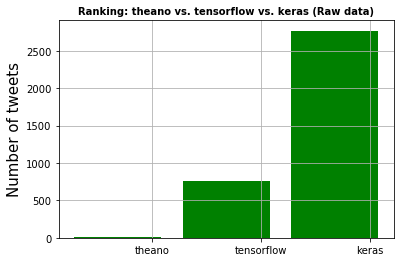

In [5]:
prg_langs = ['theano', 'tensorflow', 'keras']
tweets_by_prg_lang = [tweets['theano'].value_counts()[True], tweets['tensorflow'].value_counts()[True], tweets['keras'].value_counts()[True]]

x_pos = list(range(len(prg_langs)))
width = 0.8
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_prg_lang, width, alpha=1, color='g')

# Setting axis labels and ticks
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Ranking: theano vs. tensorflow vs. keras (Raw data)', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(prg_langs)
plt.grid()

In [15]:
tweets['programming'] = tweets['text'].apply(lambda tweet: word_in_text('programming', tweet))
tweets['tutorial'] = tweets['text'].apply(lambda tweet: word_in_text('tutorial', tweet))
tweets['deep learning'] = tweets['text'].apply(lambda tweet: word_in_text('deep learning', tweet))

tweets['relevant'] = tweets['text'].apply(lambda tweet: word_in_text('programming', tweet) or word_in_text('tutorial', tweet) or word_in_text('deep learning', tweet))

In [16]:
print(tweets['programming'].value_counts()[True])
print(tweets['tutorial'].value_counts()[True])
print(tweets['deep learning'].value_counts()[True])
print(tweets['relevant'].value_counts()[True])

5
4
119
121


#### Get the tweet location

In [18]:
tw = pd.DataFrame()
 
tw['text'] = list(map(lambda tweet: tweet['text'], tweets_data))
tw['location'] = list(map(lambda tweet: tweet['user']['location'], tweets_data))
tw.head()

,text,location
0,RT @gitaputrid: Siram air keras ke Novel berbu...,casa milan
1,RT @fchollet: TensorFlow 1.4 is now officially...,"Birmingham, AL"
2,RT @fchollet: TensorFlow 1.4 is now officially...,石川 能美市
3,Machine Learning with TensorFlow\n\n☞ https://...,None
4,"RT @rasbt: TensorFlow 1.4.0 was just released,...","Washington DC, USA"
